# Polynomial Linear Regression

課程範例程式及資料檔下載網址： https://www.superdatascience.com/machine-learning/

## Importing the Libraries 載入套件

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

## Importing the Dataset 讀入資料

利用 pd.read_csv 來載入資料，這組資料是一個 10 列(row) 3 行(column) 職稱位階與薪資的資料，其中共包含了 10 個位階的資訊。

In [2]:
path = '/Users/hsinyu/Desktop/Polynomial_Regression/'
dataset = pd.read_csv( path+'Position_Salaries.csv' )

In [3]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


## Dependent & independent variables 定義解釋變數及反應變數

In [4]:
X = dataset.iloc[:, 1:2].values 
y = dataset.iloc[:, 2].values

[Note] <br>
> 1. Independent Variable 的部分只會用到 Level 
> 2. 使用 `dataset.iloc[:, 1:2].values ` 而不是 `dataset.iloc[:, 1].values` 的原因是因為待會建立模型時，X 必須是 Matrix 而非Vector

## Polynomial Regression Intuition

![](plot_2_3_1.png)

#### Polynomial Linear Regression 多項式迴歸
公式如下：
$$
y = b_0 + b_1\times x_1 + b_2\times x_1^2 + ... + b_n\times x_n^n
$$
+ $y$ : Dependent Variable 反應變數 
+ $b_0$ : Constant 常數項 (當 $x_1...x_n=0$ 時 對應的 $y$ 值)
+ $b_i$ : Coefficient $x_1^i$的係數，指當 $x_1^i$ 變動一單位影響 $y$ 的變化 
+ $x_1^i$ : Independent Variable 解釋變數 $x_1$

> [Note] <br>
> 1. Multiple Linear Regression 有多個解釋變數 $x_i，i=1,...n$ ； Polynomial Linear Regression 只有一個解釋變數 $x_1$ ，但有不同程度的影響
> 2. 為甚麼這裡還是稱 Polynomial <span style="color:red">Linear</span> Regression ；<br>
  <span style="color:red">Linear</span> 的定義是以 $b_i$ Coefficient (係數項)來看，因為 Coefficient 是未知的我們需要找出實際的 Coefficient 加入 Independent Variable $x$ 來建立 Model 去預測 Dependent Variable $y$ ，所以這裡稱的 Liner 指的是由 $b_i$ 組成的線性組合

***以下圖為例*** <br>
當使用 Simple Linear Regression 時，Model 配適的不是很好。<br>
但 Polynomial Regression 可以將 Model 配適成一個拋物線，也更適合此組資料。

![](plot_2_3_2.png)

> [Note] <br>
> 1. 不同類型的資料會適用不同的方法，有時可能是 Simple Linear Regression 也可能是 Polynomial Linear Regression... ，建議都去試試看
> 2. 在探討傳播疾病或流行病蔓延的問題時，使用 Polynomial Linear Regression 會有不錯的效果

以這個 dataset 為例，想了解位階與薪資之間的關係 <br>
> 假設位階與薪資之間是呈現一個曲線關係，那麼想判定一名新進員工的預期年薪是否符合他所說的標準，則可以使用該名員工前公司各職稱與位階的年薪，建立出一個多項式迴歸模型來做判定。 <br><br>
> 下圖為各位階與薪水的關係，可以發現確實有一個曲線的關係存在
![](plot_2_3_3.png)


套用在多項式迴歸的公式中可以表示成：
$$
Salary=b0+b1×Level+b2×Level^2+b3×Level^3+b4×Level^4
$$ 
<br>
<font class="alert alert-danger"> Exercise </font> 有一名 Level=6.5 的員工，宣稱他的年薪要 16 萬，希望利用多項式迴歸模型來驗證他說的話是否誠實

## Splitting the dataset into the Training set and Test set 切分訓練及測試樣本

因為這個 dataset 只有 10 筆觀測值，若硬要做切分訓練及測試樣本那麼會不夠資訊來建立模型，因此不建議做切分訓練及測試樣本。

## Fitting Simple Linear Regression to the Training set

> [Note] <br>
> 為了比較 Simple Linear Regression 與 Polynomial Linear Regression 

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Visualising the Linear Regression results

<IPython.core.display.Javascript object>


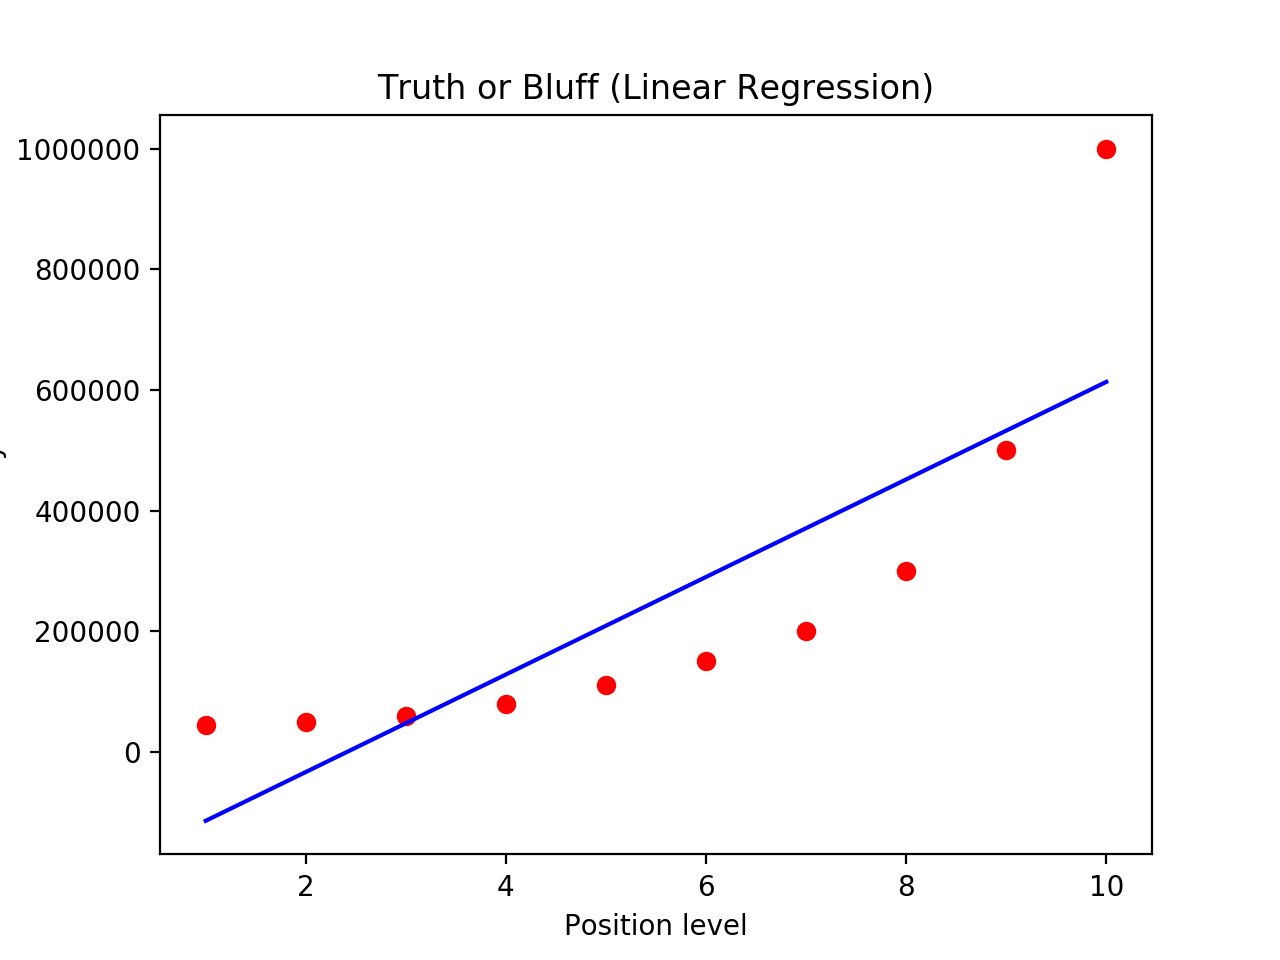

In [6]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

> [Note]
> 1. 發現實際上的點都離預測值很遠(只有 level=3 的那點最接近)
> 2. 以 level=10 為例，實際上大約有年薪 100 萬，但利用 Simple Linear Regression 預測出來只有年薪 65 萬

# Predicting a new result with Linear Regression

In [7]:
lin_reg.predict(6.5)

array([ 330378.78787879])

<font class="alert alert-success"> Answer </font> 利用 Simple Linear Regression 預測 level=6.5 的年薪有 33 萬，代表需要多付他 17 萬年薪，是這樣嗎？

## Fitting Polynomial Regression to the dataset

#### 使用 sklearn.preprocessing 中的 PolynomialFeatures 來創建出具有 Polynomial 效果的 Independent Variable 矩陣，接著利用 sklearn.linear_model 中的 LinearRegression 來建立 Polynomial Regression Model

A. 建立 degree=2 的 Polynomial Regression Model，名為 <span style="color:blue">lin_reg_2</span>

In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg_2 = PolynomialFeatures(degree = 2)
X_poly_2 = poly_reg_2.fit_transform(X)
poly_reg_2.fit(X_poly_2, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly_2, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

> [Note]
> 1. X
```python
array([[ 1],
          [ 2],
          [ 3],
          [ 4],
          [ 5],
          [ 6],
          [ 7],
          [ 8],
          [ 9],
          [10]])
```  
> 2. X_poly_2
```python
array([[  1,   1,   1],
          [  1,   2,   4],
          [  1,   3,   9],
          [  1,   4,  16],
          [  1,   5,  25],
          [  1,   6,  36],
          [  1,   7,  49],
          [  1,   8,  64],
          [  1,   9,  81],
          [  1,  10, 100]])
```
> X_poly_2 多了兩行，(1) `X_poly_2[:,0]`：截距項；(2) `X_poly_2[:,2]`： $Level^2$ (`X_poly_2[:,1]`$^2$)；

B. 建立 degree=3 的 Polynomial Regression Model，名為 <span style="color:blue">lin_reg_3</span>

In [9]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg_3 = PolynomialFeatures(degree = 3)
X_poly_3 = poly_reg_3.fit_transform(X)
poly_reg_3.fit(X_poly_3, y)
lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_poly_3, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

C. 建立 degree=4 的 Polynomial Regression Model，名為 <span style="color:blue">lin_reg_4</span>

In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg_4 = PolynomialFeatures(degree = 4)
X_poly_4 = poly_reg_4.fit_transform(X)
poly_reg_4.fit(X_poly_4, y)
lin_reg_4 = LinearRegression()
lin_reg_4.fit(X_poly_4, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

#### A. 建立 degree=2 的 Polynomial Regression Model，名為 <span style="color:blue">lin_reg_2</span>

<IPython.core.display.Javascript object>


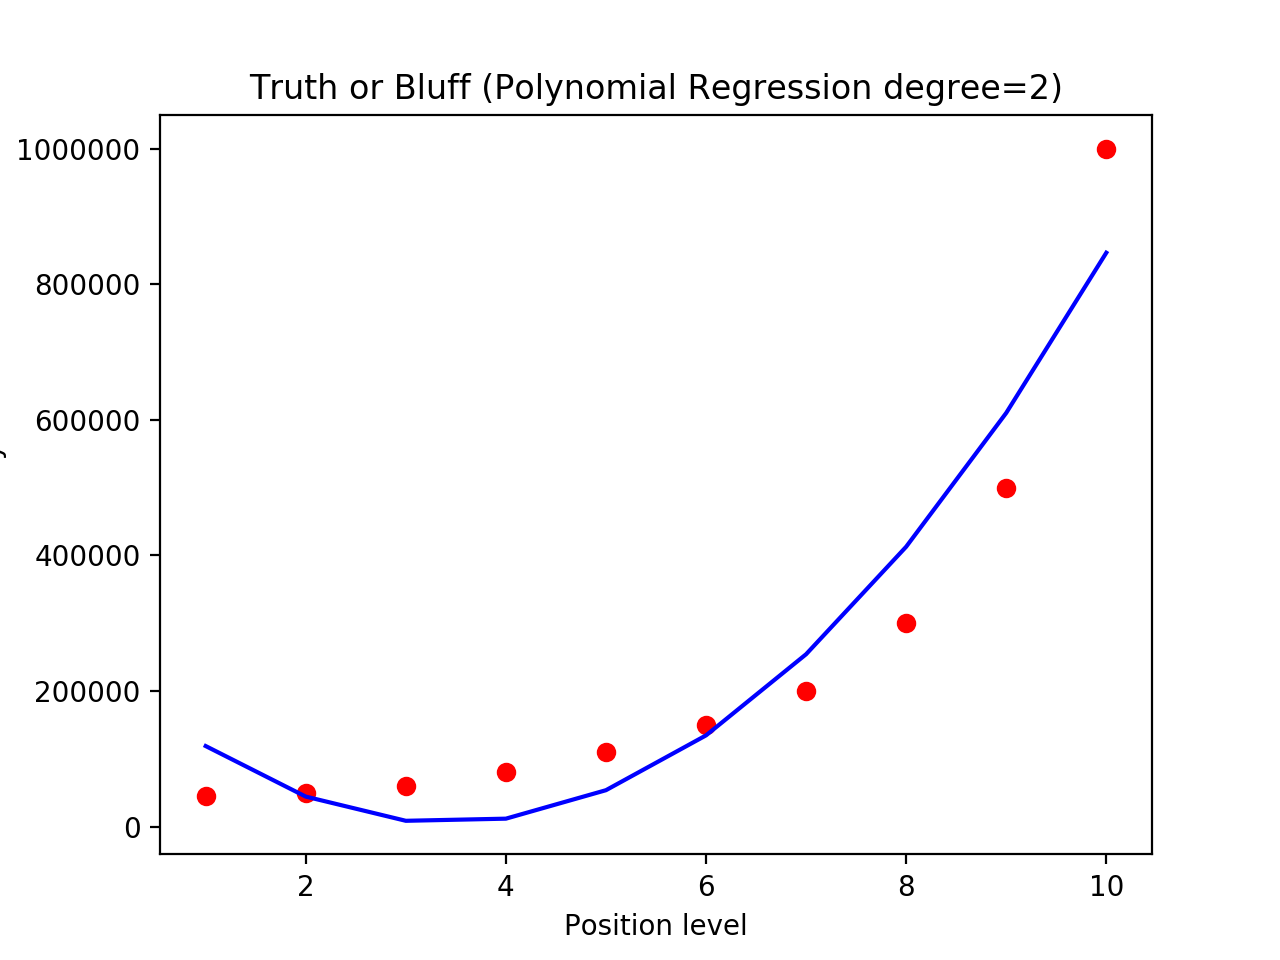

In [11]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg_2.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression degree=2)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

> [Note]
> 1. 以 level=10 為例，實際上大約有年薪 100 萬，但利用 Polynomial Regression 預測出來只有年薪 90 萬
> 2. 這部份 `plt.plot(X, lin_reg_2.predict(poly_reg_2.fit_transform(X)), color = 'blue')`，選用 `lin_reg_2.predict(poly_reg_2.fit_transform(X))` 而不是 `X_poly_2` 的原因是，若未來增加 X 資料點，那就需要重新計算 `X_poly_2` 但若使用 `lin_reg_2.predict(poly_reg_2.fit_transform(X))` 則不需要重新計算

#### B. 建立 degree=3 的 Polynomial Regression Model，名為 <span style="color:blue">lin_reg_3</span>

<IPython.core.display.Javascript object>


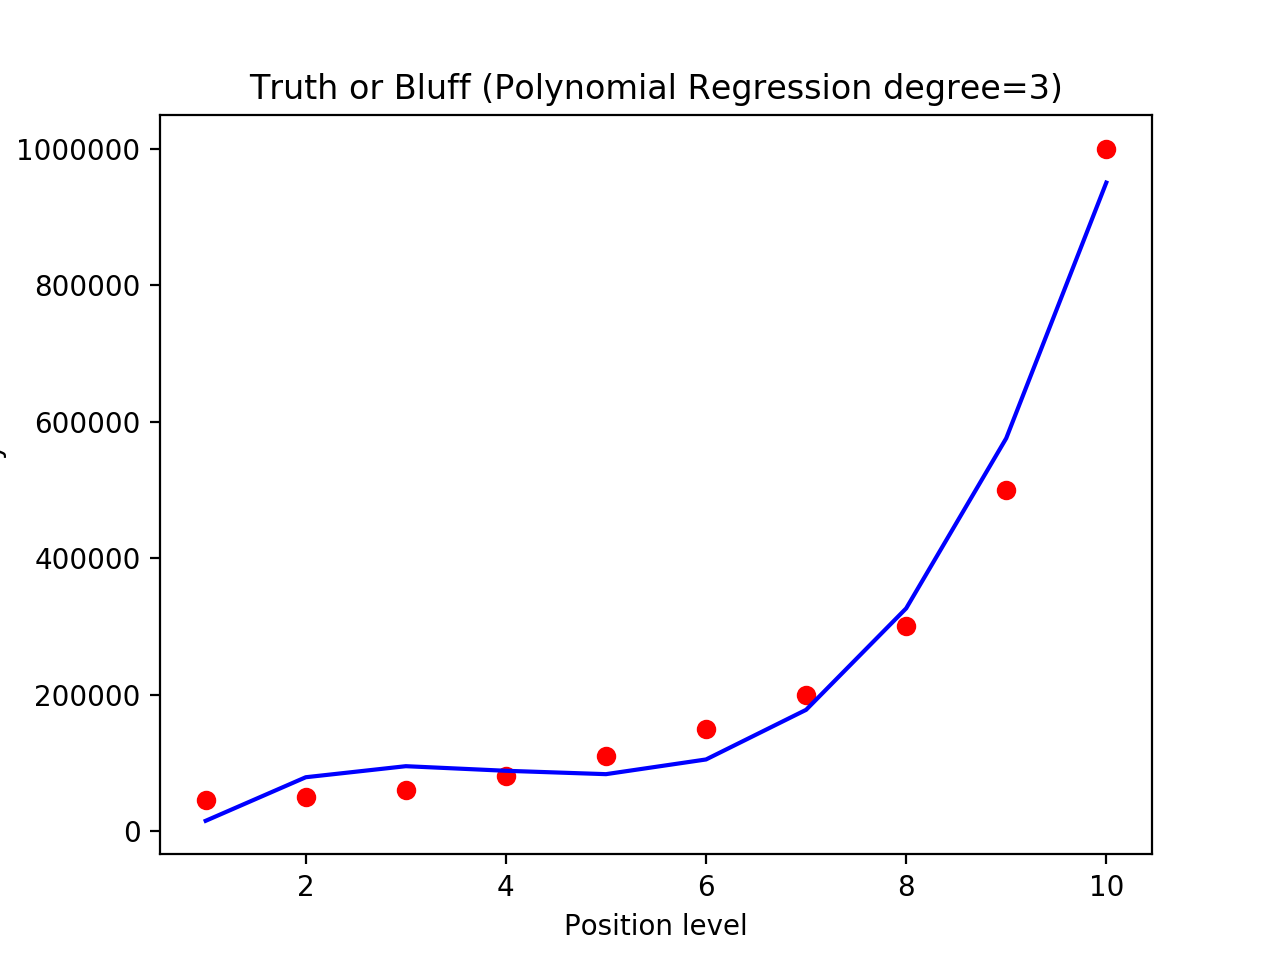

In [12]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_3.predict(poly_reg_3.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression degree=3)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

> [Note]
> 1. 以 level=10 為例，實際上大約有年薪 100 萬，但利用 Polynomial Regression 預測出來只有年薪 98 萬

#### C. 建立 degree=4 的 Polynomial Regression Model，名為 <span style="color:blue">lin_reg_4</span>

<IPython.core.display.Javascript object>


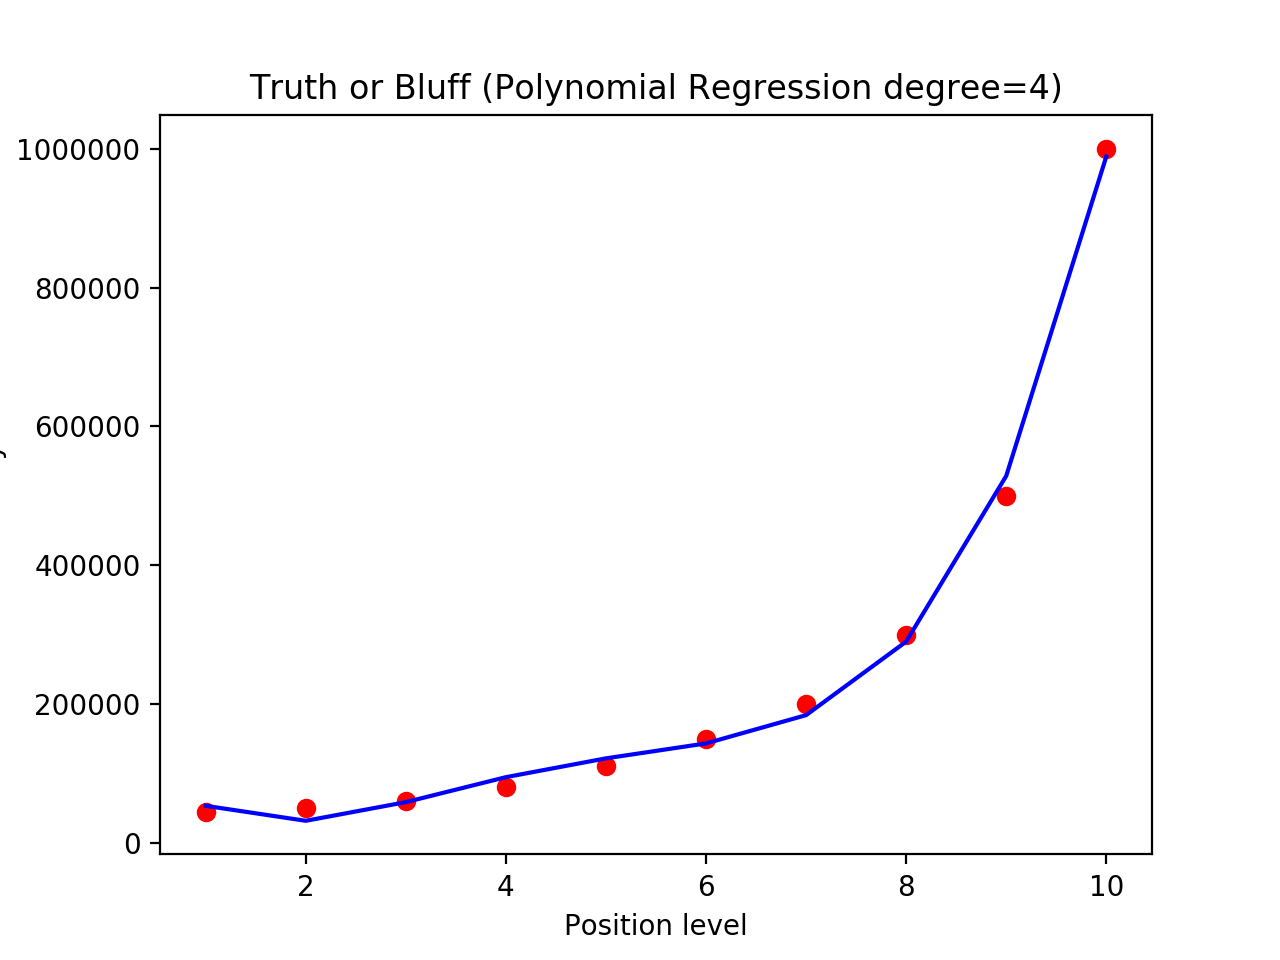

In [13]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_4.predict(poly_reg_4.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression degree=4)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

> [Note]
> 1. 以 level=10 為例，實際上大約有年薪 100 萬，但利用 Polynomial Regression 預測出來只有年薪 100 萬
> 2. 到 degree=4 時，發現 Model 跟實際值越來越接近了

#### D. 將 degree=4 的 Polynomial Regression Model 曲線更平滑

讓曲線畫起來更平滑的方式，就是去增加資料點 <br><br>
**Step1.** 利用 `np.arange` 去產生一個`min(X), max(X)`每次間隔 0.1 的序列
```python
X_grid = np.arange(min(X), max(X), 0.1)
```
```
array([ 1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,
        2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,
        3.2,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,
        4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,
        5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,
        6.5,  6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,
        7.6,  7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,
        8.7,  8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,
        9.8,  9.9])
```
> 此時產生的 `X_grid` 是一個 `1d-ndarray`(可以利用 `X_grid.ndim` 檢查維度)，但因為 plt.plot 中必須要放一個 `2d-ndarray` 且外觀為 `1xN` 的資料格式，所以需要將資料 reshape 更改 `X_grid` 的外觀 

**Step2.** `.rshape(m,n)` 可以把 `ndarray ` 轉成 `mxn`
```python
X_grid = X_grid.reshape((len(X_grid), 1))
```
```
array([[ 1. ],
       [ 1.1],
       [ 1.2],
       [ 1.3],
       [ 1.4],
       [ 1.5],
       [ 1.6],
       [ 1.7],
       [ 1.8],
       [ 1.9],
       [ 2. ],
       [ 2.1],
       [ 2.2],
       ...
       [ 9.7],
       [ 9.8],
       [ 9.9]])
```
> 此時修正後的 `X_grid` 變成一個 `1x90` 的 `2d-ndarray` 

<IPython.core.display.Javascript object>


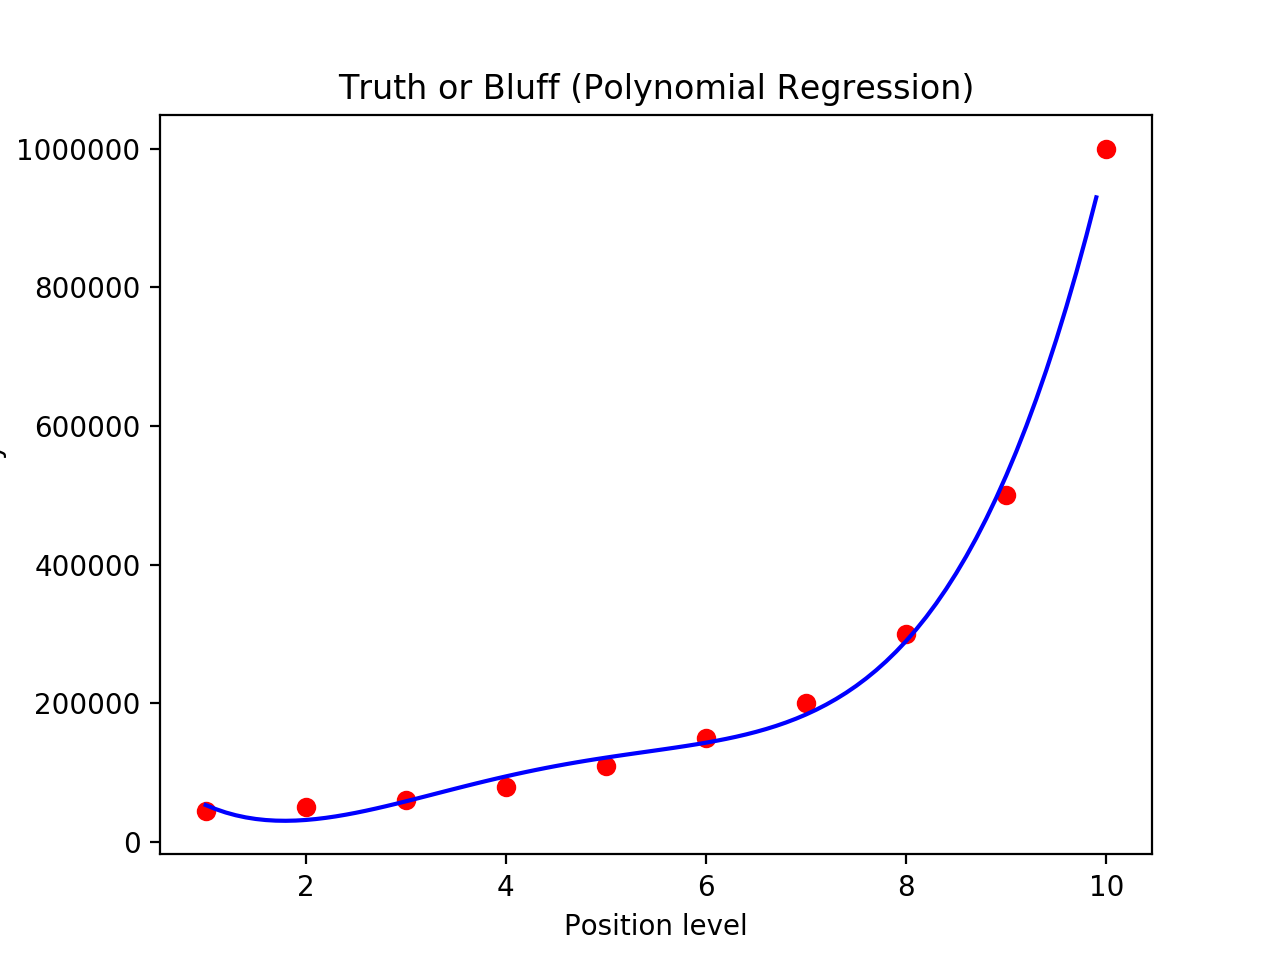

In [14]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_4.predict(poly_reg_4.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

> [Note]
> 1. Model 變平滑

# Predicting a new result with Polynomial Regression

In [15]:
lin_reg_4.predict(poly_reg_4.fit_transform(6.5))

array([ 158862.45265152])

<font class="alert alert-success"> Answer </font> 利用 Polynomial Regression 預測 level=6.5 的年薪約有 16 萬，表示該名員工提出的需求很誠實。